# Predicting Economic Growth of Countries

# Abstract

Some of the code snippets taken from kaggle require the pandas adaptor for kagglehub which isn't available via conda. The following cell simply installs this

In [1]:
!pip install "kagglehub[pandas-datasets]"

We first load "Thyroid Cancer Risk" dataset from kaggle using kagglehub and the kagglehub pandas adaptor and save it to the variable ```df```. The dataset includes spaces in some of the headers and others not, which can be problematic when trying to reference these columns using pandas. To fix this, the column names have their whitespace stripped and overwritten. You can see the data set outputted belo

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.feature_selection import r_regression
import matplotlib.pyplot as plt
import seaborn as sns

# dataset and code as from [1]
file_path = "thyroid_cancer_risk_data.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "bhargavchirumamilla/thyroid-cancer-risk-dataset",
  file_path,
)
# End of source [1]

# Remove unnecassary column
df = df.drop(columns="Patient_ID")
df


/home/aidan/miniconda3/envs/cwEnv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


encode data

In [3]:
#Encode data
le = LabelEncoder()
encoded_df = df.copy()

columns = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure", "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk", "Diagnosis"]

for column in columns:
  encoded_df[column] = le.fit_transform(df[column])

encoded_df

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,58,0,3,1,0,0,0,0,1,0,2.00,0.64,11.92,1.48,1,0
212687,89,1,4,4,0,0,0,0,1,0,9.77,3.25,7.30,4.46,2,0
212688,72,0,5,3,0,0,0,0,0,1,7.72,2.44,8.71,2.36,2,0
212689,85,0,0,4,0,0,0,0,0,1,5.62,2.53,9.62,1.54,2,0


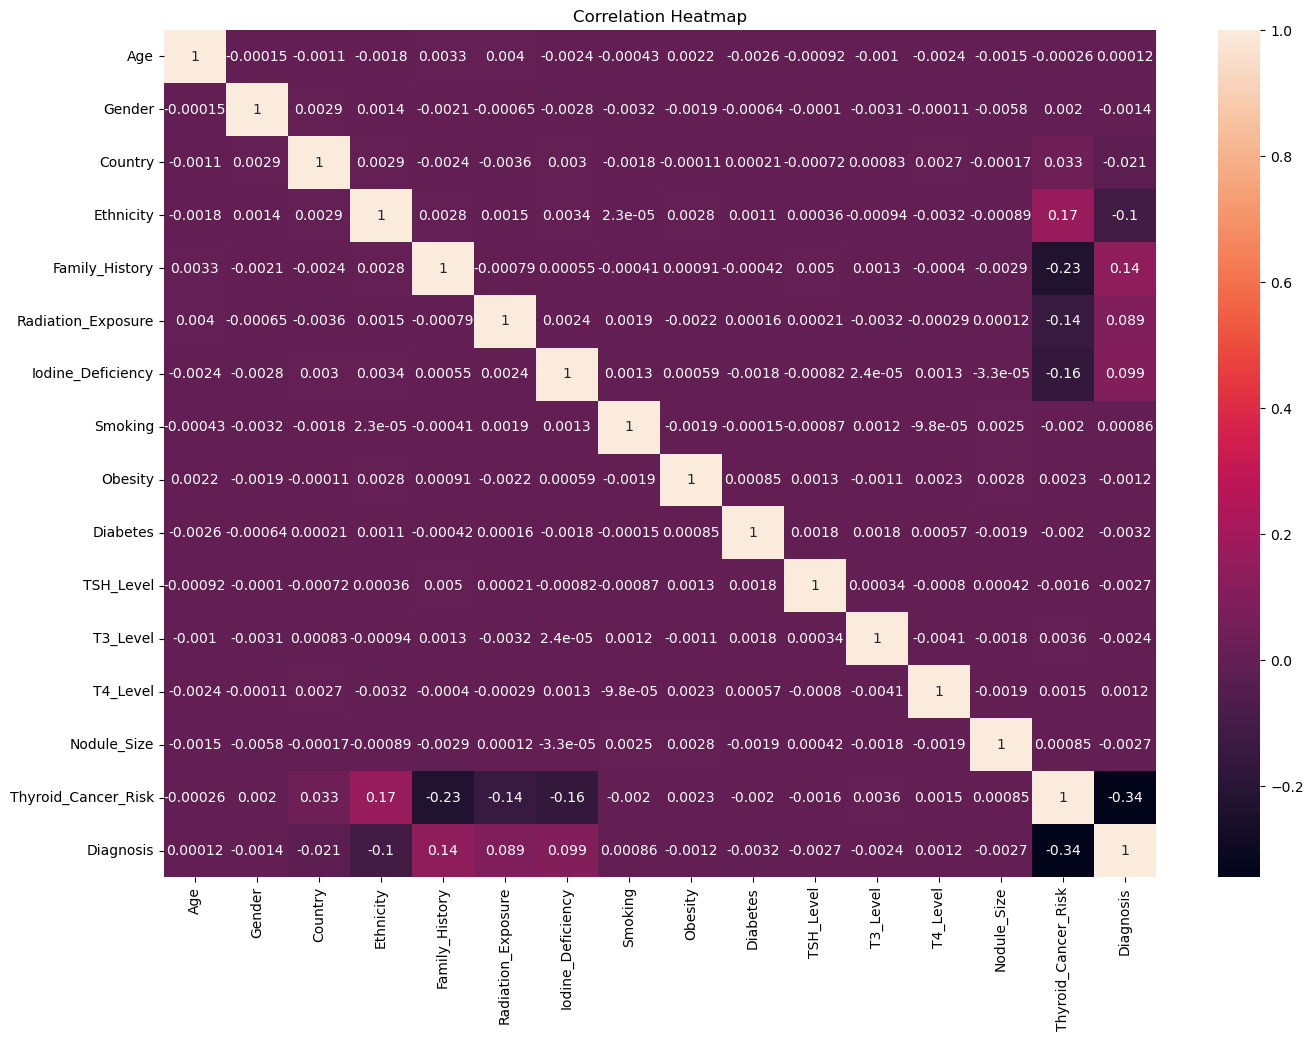

In [8]:
## Correlation Heatmap
plt.figure(figsize=(16, 11))
corr = encoded_df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
normalized_df = normalize(encoded_df)
normalized_df

array([[1.18936824e-03, 1.32812787e-01, 9.91140204e-01, 1.08364662e-04,
        6.36312011e-04, 1.68493835e-04],
       [1.15163705e-03, 1.28663450e-01, 9.91687457e-01, 2.02176282e-04,
        5.71979733e-04, 9.78891490e-05],
       [1.11620842e-03, 1.24767296e-01, 9.92185258e-01, 1.28363968e-04,
        5.02293787e-04, 1.41386399e-04],
       ...,
       [5.81872368e-03, 9.80939835e-01, 1.93957456e-01, 9.69787281e-03,
        2.42446820e-03, 1.93957456e-03],
       [5.78699529e-03, 9.76073205e-01, 2.17012323e-01, 1.20562402e-02,
        2.41124804e-03, 1.44674882e-03],
       [5.75276338e-03, 9.70778821e-01, 2.39698474e-01, 9.58793897e-03,
        2.39698474e-03, 1.53407024e-03]], shape=(304, 6))

split data

In [ ]:
features = normalized_df[:, :-1]
labels = normalized_df[:, [-1]]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

apply linear regression

In [ ]:
#Code from [2]
class LinearRegressionModel(torch.nn.Module):
	def __init__(self, features_count):
		super(LinearRegressionModel, self).__init__()
		self.linear = torch.nn.Linear(in_features=features_count, out_features=1)

	def forward(self, x):
		y_pred = self.linear(x)
		return y_pred

reg = LinearRegressionModel(x_train.shape[1])
criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(reg.parameters(), lr = 0.001, weight_decay=1e-5)
losses = []
epochs = 20
for epoch in range(epochs):
	y_pred = reg(x_train)
	loss = criterion(y_pred, y_train)
	losses.append(loss.item())
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()   
	print(f"epoch = {epoch}, loss = {loss}")
print("Done training!")
#End of source [2]


/home/aidan/miniconda3/envs/cwEnv/lib/python3.13/site-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch = 0, loss = 18.434192657470703
epoch = 1, loss = 2.3358311653137207
epoch = 2, loss = 1.9039312601089478
epoch = 3, loss = 1.6621500253677368
epoch = 4, loss = 1.453970193862915
epoch = 5, loss = 1.2736115455627441
epoch = 6, loss = 1.1173391342163086
epoch = 7, loss = 0.9819297790527344
epoch = 8, loss = 0.8645920753479004
epoch = 9, loss = 0.7629083395004272
epoch = 10, loss = 0.6747840642929077
epoch = 11, loss = 0.5984049439430237
epoch = 12, loss = 0.5321996808052063
epoch = 13, loss = 0.4748070240020752
epoch = 14, loss = 0.4250478744506836
epoch = 15, loss = 0.38190120458602905
epoch = 16, loss = 0.3444821834564209
epoch = 17, loss = 0.3120245933532715
epoch = 18, loss = 0.28386473655700684
epoch = 19, loss = 0.2594276964664459
Done training!


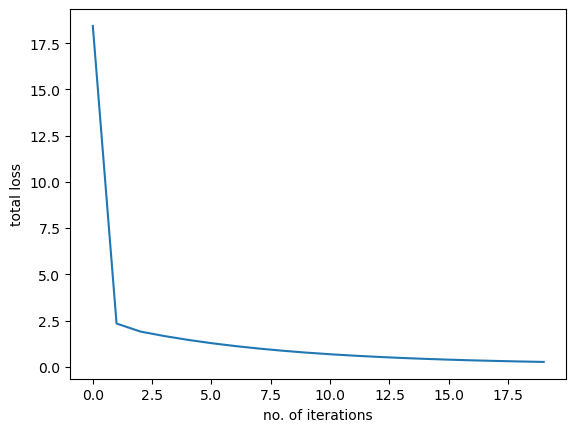

In [ ]:
plt.plot(losses)
plt.xlabel("no. of iterations")
plt.ylabel("total loss")
plt.show()

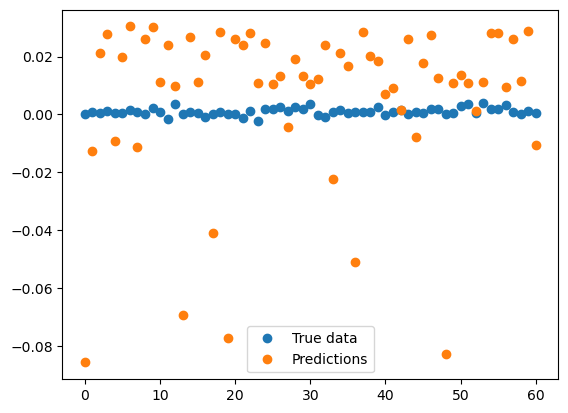

In [ ]:
# Code from [3]
# Clear figure
plt.clf()

# Get predictions
predicted = reg(x_test).data.numpy()

# Plot true data
plt.plot(y_test, 'o', label='True data')

# Plot predictions
plt.plot(predicted, 'o', label='Predictions')

# Legend and plot
plt.legend(loc='best')
plt.show()
# End of [3]

# References
1. https://www.kaggle.com/datasets/bhargavchirumamilla/thyroid-cancer-risk-dataset
2. https://www.geeksforgeeks.org/linear-regression-using-pytorch/
3. https://www.deeplearningwizard.com/deep_learning/practical_pytorch/pytorch_linear_regression/#building-model